In [266]:
#First out imports
#Lets import some stuff!

#Numpy
import numpy as np

#Cartopy for mapping
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as feat


#Matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

#date tools
from datetime import datetime, timedelta
from netCDF4 import num2date

#os tools
import os

#pandas
import pandas as pd

from metpy.calc import get_wind_components
from metpy.calc import reduce_point_density
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, StationPlot
from metpy.plots.wx_symbols import current_weather, sky_cover, wx_code_map
from metpy.units import units
import cartopy.io.img_tiles as cimgt

%matplotlib inline

K1H2
K3LF
K9V9
KAAA
KADU
KAEL
KAFK
KAIO
KAJG
KALN
KANW
KASW
KAUH
KAUM
KAVK
KAWG
KAXA
KAZO
KBEH
KBIE
KBIV
KBLV
KBNW
KBTL
KBUU
KBVN
KC09
KC75
KCAV
KCBF
KCCY
KCDJ
KCHA
KCHK
KCIN
KCIR
KCKP
KCLK
KCMY
KCNC
KCQB
KCSQ
KCSV
KCUH
KCUL
KDBQ
KDEH
KDKB
KDLL
KDNS
KDNV
KDPA
KDVP
KEBS
KEFT
KEND
KENL
KENW
KEOK
KEST
KETB
KFEP
KFET
KFFL
KFKA
KFLD
KFOA
KFRI
KFSD
KFSW
KFTK
KFWA
KFWC
KGBG
KGCM
KGGI
KGLW
KGMJ
KGRR
KGSH
KGUS
KGYY
KHAI
KHDE
KHHF
KHJH
KHNR
KHOP
KHSB
KIAB
KICL
KICR
KIGQ
KIIB
KIJX
KIKK
KIKV
KIRS
KJOT
KJSV
KJVL
KJWG
KJYG
KJYR
KLCG
KLDM
KLNR
KLOT
KLRJ
KLSE
KLWA
KLXN
KLYV
KM30
KMCW
KMIE
KMJQ
KMKE
KMKG
KMLE
KMPZ
KMQB
KMRJ
KMUT
KMWA
KMWC
KMWM
KMXO
KNQA
KOEB
KOFF
KOFK
KOKM
KOLY
KOLZ
KONL
KOOA
KORC
KOSH
KOTG
KOUN
KOXV
KP28
KPDC
KPEA
KPNT
KPPQ
KPQN
KPRG
KPTT
KRAC
KRDK
KRKR
KROG
KRPJ
KRQB
KRQO
KRST
KRSV
KRYV
KSAR
KSBM
KSBN
KSDA
KSDF
KSFY
KSHL
KSLB
KSLO
KSNL
KSPW
KSZL
KTAZ
KTBN
KTIK
KTIP
KTNU
KTQH
KUES
KUGN
KUNU
KVBT
KVOK
KVPZ
KVTI
KVYS
KWDG
KWWR
KXNA


In [184]:
def extract_time(pd_dict, dt, varss=None, debug=False):
    obs_table = {}
    stations = list(pd_dict.keys())
    if varss is None:
        varss = list(pd_dict[stations[0]].keys())
    for var in varss:
        obs_table.update({var : np.array([])})
    for station in stations:
        try:
            if debug:
                print(station)
            idx = pd_dict[station].index.get_loc(dt, method='nearest')
            s = pd_dict[station].iloc[idx]
            for p in varss:
                obs_table[p] = np.append(obs_table[p], s[p])
        except:# pd.errors.InvalidIndexError:
            print(station, "something went wrong")
    return varss, obs_table

        
    


In [191]:
my_time = datetime(2017, 12, 5, 0,55)
meas, at_time = extract_time(pandas_dict, my_time)


KAZO something went wrong
KFWA something went wrong
KGRR something went wrong
KGUS something went wrong
KMIE something went wrong
KMKG something went wrong
KSBN something went wrong
KUES something went wrong
KUGN something went wrong
KVOK something went wrong


In [219]:
def region_plot(obs_panel, wind_units = None):
    
    if wind_units is None:
        wind_units = 'knots'
    proj = ccrs.PlateCarree()

    # Use the cartopy map projection to transform station locations to the map and
    # then refine the number of stations plotted by setting a 300km radius
    point_locs = proj.transform_points(ccrs.PlateCarree(), obs_panel['lon'], obs_panel['lat'])
    u, v = get_wind_components((obs_panel['wind_speed'] * units('m/s')).to('knots'),
                               obs_panel['wind_from_direction'] * units.degree)

    # Convert the fraction value into a code of 0-8 and compensate for NaN values,
    # which can be used to pull out the appropriate symbol
    cloud_frac = (8 * obs_panel['cloud_area_fraction'])
    cloud_frac[np.isnan(cloud_frac)] = 10
    cloud_frac = cloud_frac.astype(int)

    # Map weather strings to WMO codes, which we can use to convert to symbols
    # Only use the first symbol if there are multiple
    wx_codes = obs_panel['weather']
    bad_juju = wx_codes == ''
    wx_codes[bad_juju] = ''
    wx = [wx_code_map[s[2:-1].split()[0] if ' ' in s else s[2:-1]] for s in wx_codes]
    fig = plt.figure(figsize=(20, 10))
    #add_metpy_logo(fig, 1000, 50, size='small')
    ax = fig.add_subplot(1, 1, 1, projection=proj)

    # Set up a cartopy feature for state borders.
    state_boundaries = feat.NaturalEarthFeature(category='cultural',
                                                name='admin_1_states_provinces_lines',
                                                scale='110m', facecolor='none')

    # Add some various map elements to the plot to make it recognizable.
    ax.add_feature(feat.LAND, zorder=-1)
    ax.add_feature(feat.OCEAN, zorder=-1)
    ax.add_feature(feat.LAKES, zorder=-1)
    ax.coastlines(resolution='110m', zorder=2, color='black')
    ax.add_feature(state_boundaries, edgecolor='black')
    ax.add_feature(feat.BORDERS, linewidth=2, edgecolor='black')

    # Set plot bounds
    ax.set_extent((-118, -73, 23, 50))

    #
    # Here's the actual station plot
    #

    # Start the station plot by specifying the axes to draw on, as well as the
    # lon/lat of the stations (with transform). We also the fontsize to 12 pt.
    stationplot = StationPlot(ax, obs_panel['lon'], obs_panel['lat'], clip_on=True,
                              transform=ccrs.PlateCarree(), fontsize=12)

    # Plot the temperature and dew point to the upper and lower left, respectively, of
    # the center point. Each one uses a different color.
    stationplot.plot_parameter('NW', obs_panel['air_temperature'], color='red')
    stationplot.plot_parameter('SW', obs_panel['dew_point_temperature'],
                               color='darkgreen')

    # A more complex example uses a custom formatter to control how the sea-level pressure
    # values are plotted. This uses the standard trailing 3-digits of the pressure value
    # in tenths of millibars.
    #stationplot.plot_parameter('NE', obs_panel['slp'], formatter=lambda v: format(10 * v, '.0f')[-3:])

    # Plot the cloud cover symbols in the center location. This uses the codes made above and
    # uses the `sky_cover` mapper to convert these values to font codes for the
    # weather symbol font.
    stationplot.plot_symbol('C', cloud_frac, sky_cover)

    # Same this time, but plot current weather to the left of center, using the
    # `current_weather` mapper to convert symbols to the right glyphs.
    stationplot.plot_symbol('W', wx, current_weather)

    # Add wind barbs
    stationplot.plot_barb(u, v)

    # Also plot the actual text of the station id. Instead of cardinal directions,
    # plot further out by specifying a location of 2 increments in x and 0 in y.
    stationplot.plot_text((2, 0), obs_panel['station'])

    bbox = [obs_panel['lon'].min(), obs_panel['lon'].max(), obs_panel['lat'].min(),obs_panel['lat'].max()]
    tk = 1.
    ax.set_xticks(np.arange(bbox[0], bbox[1], tk), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(bbox[2], bbox[3], tk), crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True, number_format='.1f')
    lat_formatter = LatitudeFormatter(number_format='.1f')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.set_extent(bbox)
    tt = 'Observations at ' + obs_panel['time'][0] + ' UTC'
    
    plt.title(tt)
    
    #plt.show()
    plt.savefig('/Users/scollis/funded_projects/precip_change/images/vectors.png')

In [274]:
def region_plot_vect(obs_panel, wind_units = None, fname = None,
                    extent = None, show_ge = False):
    
    if wind_units is None:
        wind_units = 'knots'
    proj = ccrs.PlateCarree()

    # Use the cartopy map projection to transform station locations to the map and
    # then refine the number of stations plotted by setting a 300km radius
    point_locs = proj.transform_points(ccrs.PlateCarree(), obs_panel['lon'], obs_panel['lat'])
    u, v = get_wind_components((obs_panel['wind_speed'] * units('m/s')).to('knots'),
                               obs_panel['wind_from_direction'] * units.degree)

    # Convert the fraction value into a code of 0-8 and compensate for NaN values,
    # which can be used to pull out the appropriate symbol
    fig = plt.figure(figsize=(20, 10))
    #add_metpy_logo(fig, 1000, 50, size='small')
    ax = fig.add_subplot(1, 1, 1, projection=proj)

    # Set up a cartopy feature for state borders.
    state_boundaries = feat.NaturalEarthFeature(category='cultural',
                                                name='admin_1_states_provinces_lines',
                                                scale='110m', facecolor='none')

    # Add some various map elements to the plot to make it recognizable.
    ax.add_feature(feat.LAND, zorder=-1)
    ax.add_feature(feat.OCEAN, zorder=-1)
    ax.add_feature(feat.LAKES, zorder=-1)
    ax.coastlines(resolution='110m', zorder=2, color='black')
    ax.add_feature(state_boundaries, edgecolor='black')
    ax.add_feature(feat.BORDERS, linewidth=2, edgecolor='black')

    # Set plot bounds
 
    #
    # Here's the actual station plot
    #

    # Start the station plot by specifying the axes to draw on, as well as the
    # lon/lat of the stations (with transform). We also the fontsize to 12 pt.
    stationplot = StationPlot(ax, obs_panel['lon'], obs_panel['lat'], clip_on=True,
                              transform=ccrs.PlateCarree(), fontsize=12)

    # Plot the temperature and dew point to the upper and lower left, respectively, of
    # the center point. Each one uses a different color.
    stationplot.plot_parameter('NW', obs_panel['wind_speed'], color='red')
    #stationplot.plot_parameter('SW', obs_panel['dew_point_temperature'],
    #                           color='darkgreen')
    npts = len(stationplot.x)
    #for i in range(npts):
    plt.quiver(stationplot.x, stationplot.y, u, v)

    # A more complex example uses a custom formatter to control how the sea-level pressure
    # values are plotted. This uses the standard trailing 3-digits of the pressure value
    # in tenths of millibars.
    #stationplot.plot_parameter('NE', obs_panel['slp'], formatter=lambda v: format(10 * v, '.0f')[-3:])

    # Plot the cloud cover symbols in the center location. This uses the codes made above and
    # uses the `sky_cover` mapper to convert these values to font codes for the
    # weather symbol font.
    #stationplot.plot_symbol('C', cloud_frac, sky_cover)

    # Same this time, but plot current weather to the left of center, using the
    # `current_weather` mapper to convert symbols to the right glyphs.
    #stationplot.plot_symbol('W', wx, current_weather)

    # Add wind barbs
    #stationplot.plot_barb(u, v)

    # Also plot the actual text of the station id. Instead of cardinal directions,
    # plot further out by specifying a location of 2 increments in x and 0 in y.
    #stationplot.plot_text((2, 0), obs_panel['station'])

    bbox = [obs_panel['lon'].min(), obs_panel['lon'].max(), obs_panel['lat'].min(),obs_panel['lat'].max()]
    tk = 2.
    ax.set_xticks(np.arange(bbox[0], bbox[1], tk), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(bbox[2], bbox[3], tk), crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True, number_format='.0f')
    lat_formatter = LatitudeFormatter(number_format='.0f')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    if extent is None:
        ax.set_extent((-118, -73, 23, 50))
    else:
        ax.set_extent(extent)

    tt = 'Observations at ' + obs_panel['time'][0] + ' UTC'
    
    plt.title(tt)
    if show_ge:
        request = cimgt.GoogleTiles(style='satellite')
        ax.add_image(request, 5, zorder=0)
    #plt.show()
    if fname is None:
        plt.savefig('/Users/scollis/funded_projects/precip_change/images/vectors.png')
    else:
        plt.savefig(fname)

In [242]:
metars_dir = '/Users/scollis/funded_projects/precip_change/data/highres2/'
all_metars = os.listdir(metars_dir)
pandas_dict = {}
for metars in all_metars:
    if '.csv' in metars:
        print(metars[0:-4])
        this_panda = pd.read_csv(metars_dir + metars)
        this_panda['date'] = pd.to_datetime(this_panda['time'])
        this_panda.index = this_panda['date']
        pandas_dict.update({metars[0:-4]:this_panda})
my_time = datetime(2017, 12, 5, 4)
meas, at_time = extract_time(pandas_dict, my_time)


CPBT
CPEH
CPFI
CPIR
CPRO
CPRY
CPST
CPSV
CPXL
CWAV
CWBO
CWBU
CWCF
CWCI
CWCJ
CWDK
CWDV
CWDZ
CWEH
CWEQ
CWFF
CWFJ
CWGM
CWGW
CWGY
CWHI
CWHN
CWII
CWIK
CWIW
CWJD
CWJI
CWJX
CWLB
CWLE
CWMQ
CWNK
CWOE
CWOY
CWPO
CWRJ
CWRM
CWRT
CWRY
CWSR
CWVI
CWVN
CWVP
CWWF
CWWS
CWXL
CWZS
CXAF
CXAG
CXAJ
CXAK
CXBA
CXBK
CXBR
CXBW
CXCA
CXCP
CXCS
CXDB
CXDP
CXDW
CXEA
CXEC
CXEG
CXFM
CXGH
CXHD
CXHR
CXKM
CXMD
CXMO
CXOL
CXOY
CXPL
CXRL
CXSC
CXSL
CXSP
CXTH
CXVM
CXWM
CXWN
CYBR
CYBU
CYBW
CYDN
CYED
CYEG
CYEN
CYGQ
CYHD
CYIV
CYKY
CYLJ
CYLL
CYNE
CYOD
CYPA
CYPL
CYQD
CYQF
CYQK
CYQL
CYQR
CYQT
CYQV
CYQW
CYRL
CYTL
CYWG
CYXE
CYXH
CYXL
CYYC
CYYN
CZMJ
CZMU
CZOL
CZPC
CZPS
CZTB
K04V
K0CO
K1H2
K20V
K2WX
K3LF
K4BM
K5SM
K7BM
K8D3
K9V9
KAAA
KACB
KACQ
KADC
KADU
KAEL
KAFF
KAFK
KAIA
KAIG
KAIO
KAIT
KAJG
KAKO
KALN
KALO
KAMW
KANE
KANW
KAQP
KARG
KARR
KARV
KASG
KASW
KATW
KATY
KAUH
KAUM
KAVK
KAWG
KAWM
KAXA
KAZO
KBAK
KBBB
KBBW
KBDE
KBDH
KBEH
KBFW
KBIE
KBIV
KBJC
KBJI
KBKF
KBLV
KBMG
KBMI
KBNA
KBNW
KBPI
KBRL
KBTL
KBUU
KBVN
KBVX
KBWG
KBWP
KBYH
KBYI
KBZN
KC09


/Users/scollis/anaconda/envs/pchange/lib/python3.6/site-packages/metpy/calc/basic.py:430: UserWarning: Input over 12.566370614359172 radians. Ensure proper units are given.
  'Ensure proper units are given.'.format(max_radians))


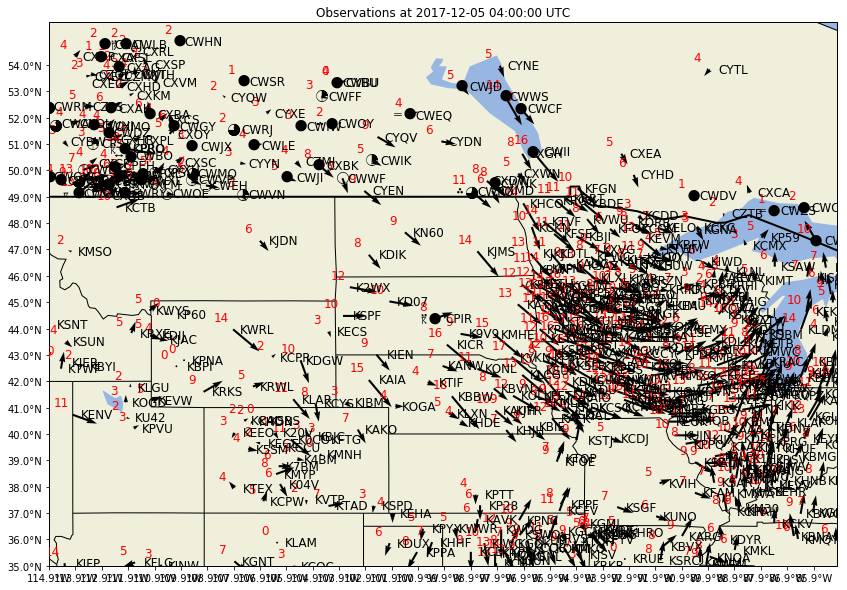

In [243]:
region_plot_vect(at_time, wind_units='km/h')

/Users/scollis/anaconda/envs/pchange/lib/python3.6/site-packages/metpy/calc/basic.py:430: UserWarning: Input over 12.566370614359172 radians. Ensure proper units are given.
  'Ensure proper units are given.'.format(max_radians))


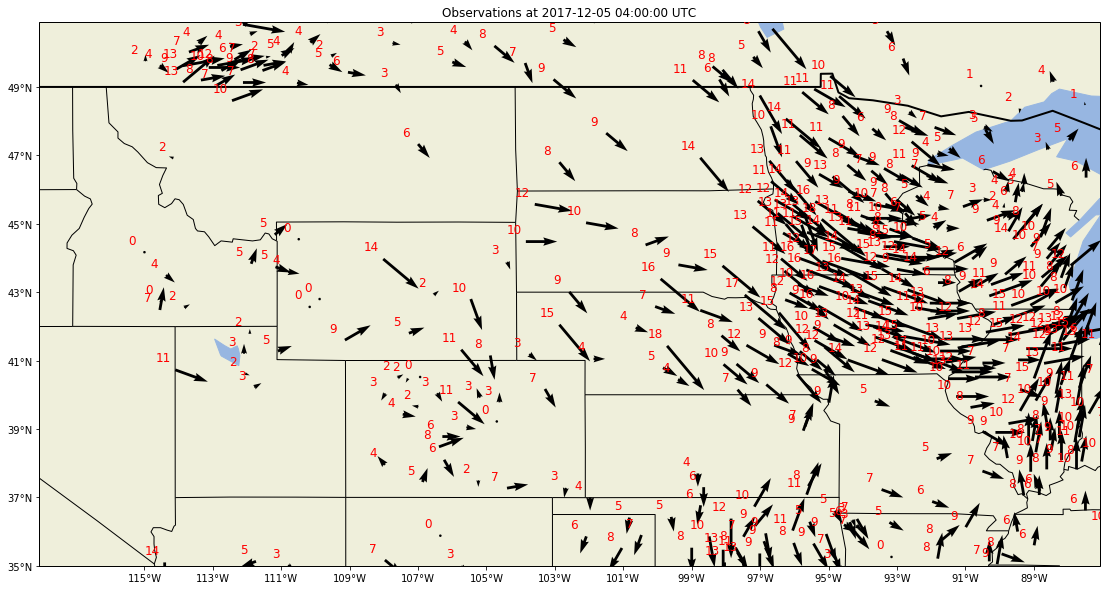

In [280]:
region_plot_vect(at_time, wind_units='km/h',
                fname='/Users/scollis/funded_projects/precip_change/images/crazy_vectors.png',
                extent=(-118, -87, 35, 50))

/Users/scollis/anaconda/envs/pchange/lib/python3.6/site-packages/metpy/calc/basic.py:430: UserWarning: Input over 12.566370614359172 radians. Ensure proper units are given.
  'Ensure proper units are given.'.format(max_radians))


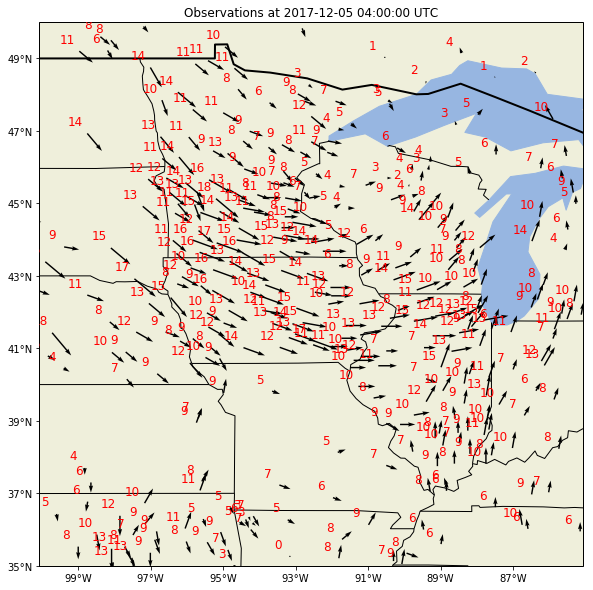

In [281]:
region_plot_vect(at_time, wind_units='km/h',
                fname='/Users/scollis/funded_projects/precip_change/images/lake_vectors.png',
                extent=(-100, -85, 35, 50))

/Users/scollis/anaconda/envs/pchange/lib/python3.6/site-packages/metpy/calc/basic.py:430: UserWarning: Input over 12.566370614359172 radians. Ensure proper units are given.
  'Ensure proper units are given.'.format(max_radians))


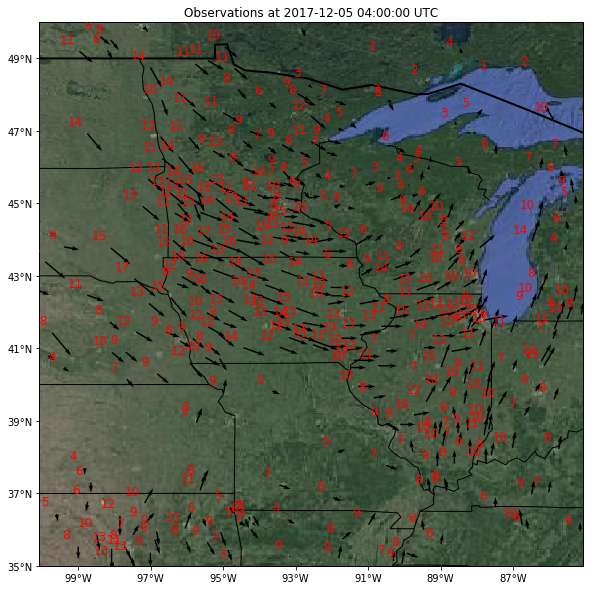

In [282]:
region_plot_vect(at_time, wind_units='km/h',
                fname='/Users/scollis/funded_projects/precip_change/images/lake_vectors_ge.png',
                extent=(-100, -85, 35, 50), show_ge=True)

/Users/scollis/anaconda/envs/pchange/lib/python3.6/site-packages/metpy/calc/basic.py:430: UserWarning: Input over 12.566370614359172 radians. Ensure proper units are given.
  'Ensure proper units are given.'.format(max_radians))


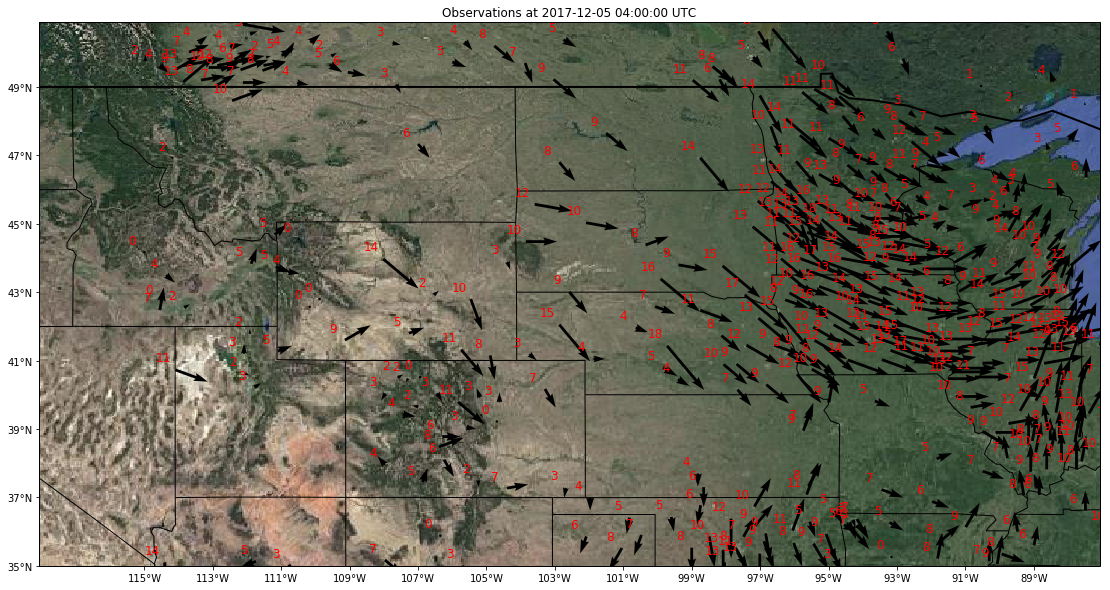

In [283]:
region_plot_vect(at_time, wind_units='km/h',
                fname='/Users/scollis/funded_projects/precip_change/images/crazy_vectors_ge.png',
                extent=(-118, -87, 35, 50), show_ge=True)